## Loading Modules

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Preparing Data

In [29]:
import os

path = os.listdir('/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [30]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [31]:
np.unique(Y)

array([0, 1])

In [32]:
X = np.array(X)
Y = np.array(Y)

In [33]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

### 395 MRI images with positive tumor
### 827 MRI images without tumor

In [34]:
X.shape

(1222, 200, 200)

## Visualize Data

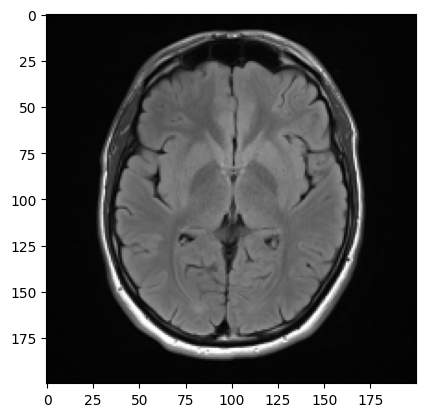

In [35]:
plt.imshow(X[0], cmap='gray')

## Preparing data

In [36]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

## Split data

### 20% - Testing and remaining 80% Training

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [38]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

## Feature Scaling

In [39]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


## Feature Selection: PCA

In [40]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pdca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [41]:
print(pca_train.shape, pca_test.shape)
print(pca.n_components_)
print(pca.n_features_)

(977, 40000) (245, 40000)
619
40000


## Train Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [43]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1)

In [44]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

## Evaluation

In [45]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9510204081632653


In [46]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9897645854657113
Testing Score: 0.9551020408163265


## Prediction

In [47]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  4,   5,  49,  54,  65, 158, 172, 216, 220, 232, 235]),)

In [48]:
pred[36]

1

In [49]:
ytest[36]

1

## Test Model

In [50]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

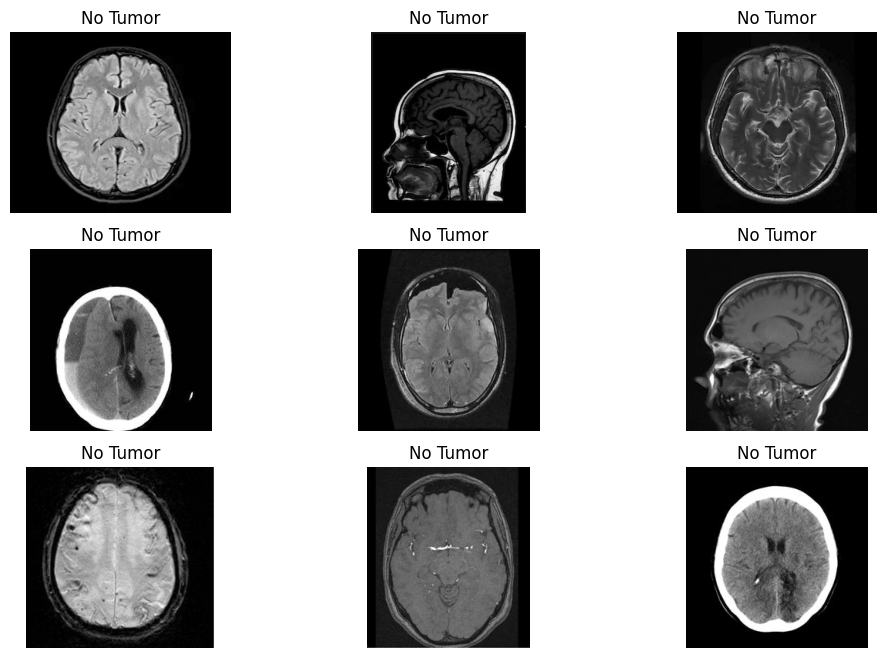

In [51]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

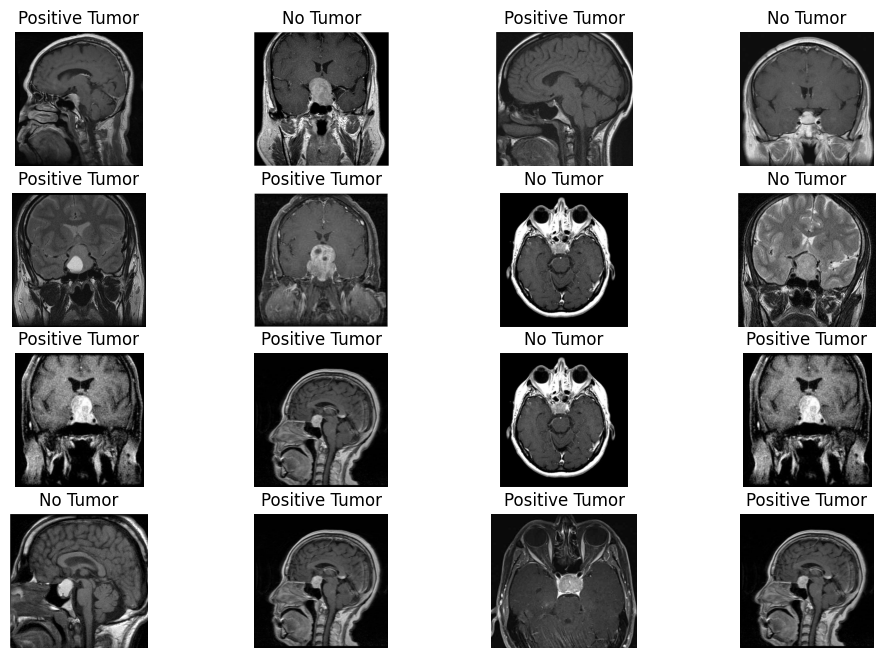

In [52]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/gdrive/MyDrive/DL/brain-tumor-classification-mri/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1